<a href="https://colab.research.google.com/github/AbimaelLopez/Diplomado/blob/main/6_Scaling%2C_CV%2C_Pipeline%2C_GridSearch_ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **6. Escalamiento y validación cruzada**

### Objetivo
Que la o el estudiante conozca el efecto del escalamiento en las características. Asimismo, que aprenda a utilizar las clases Cross Validation, Pipeline y GridSearch de la biblioteca Sklearn.

### Descripción del procedimiento a seguir
- Se carga y preprocesa el conjunto de datos apple_quality
- Se utiliza el escalador y se evalúa.
- Se utiliza la clase para validación cruzada.
- Se define un Pipeline
- Se hace búsqueda de hiperparámetros con GridSearchCV
- Se deja como ejercicio trabajar con el conjunto de datos Californa Housing


### Datos
**Profesora**: Dra. Jessica Beltrán Márquez<br>
Maestría en Ciencia de Datos y Optimización<br>
Centro de Investigación en Matemáticas Aplicadas <br>
Universidad Autónoma de Coahuila


### Bibliografía
1. https://seaborn.pydata.org/
2. https://pandas.pydata.org/
3. https://numpy.org/
4. https://matplotlib.org/
5. https://scikit-learn.org/stable/


### **1. Importar bibliotecas**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Modelo de clasificación
from sklearn.neighbors import KNeighborsClassifier
#Datasplit
from sklearn.model_selection import train_test_split
#Metricas
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
#Preprocesamiento
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### **2 Escalamiento de datos, entrenamiento y elección de hiperparámetros con conjunto de validación y evaluación en conjunto de prueba de conjunto de datos Apple Quality**

**2.1. Carga de datos**
- Se carga el archivo apple_quality.csv y se visualiza una muestra.

- Modificamos los valores de la columna 'Quality', tenemos 'good' y 'bad', y los pasamos a 1 y 0.

In [4]:
file_path = '/content/apple_quality.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)
df.dropna(inplace=True)
df['Quality'] = df['Quality'].map({'good': 1, 'bad': 0})
df.drop(columns=['A_id'], inplace=True)
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1


**2.2. Separación de características y etiquetas y escalamiento de las características**
- Se crea una nueva variable llamada X que contendrá las características de los ejemplos del dataset.
- Se crea una nueva variable llamada y que contendrá las etiquetas de los ejemplos del dataset.

In [5]:
X = df.iloc[:,:-1]  #Todas las columnas menos la última
y= df.iloc[:,-1] #La última columna

**2.3. Separación en subconjuntos de entrenamiento, validación y prueba.**
- Se utiliza la función *train_test_split* de la biblioteca Scikit-learn para separar el conjunto de datos introducido en dos. Se separa en subconjunto de entrenamiento (70%) y uno temporal (30%).


In [6]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0, stratify=y_temp)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)


Training set shape: (2800, 7)
Validation set shape: (600, 7)
Test set shape: (600, 7)


**2.4 Se instancia un método para escalar datos y se ajusta a los datos de entrenamiento, posteriormente se aplica el escalamiento también al conjunto de datos de validación y de prueba**

In [7]:
#scaler = MinMaxScaler()
scaler = StandardScaler()
 #Con los datos de entrenamiento se encuentran los parámetros del escalador, se usa fit_transform()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

#Para los datos de validación y prueba, solo se usa transform(). ya que no se vuelve a ajustar.
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

**2.5. Entrenaniemto del algoritmo de clasificación K vecinos más cercanos(KNN) y evaluación**

Para esta práctica, vamos a entrenar y evaluar usando varios números de vecinos (hyperparámetros):
- nns = [1,3,5,7,9,11,13,15]
- Entrenamos el modelo con los datos de entrenamiento
- Evaluamos el modelo con los datos de validación

Lo haremos en un ciclo for, y almacenaremos los resultados del *f1_score* en una lista. Posteriormente, obtendremos el mejor valor *f1_score* y los nn que lo produjeron.

Aprovecharemos para gráficar todos los resultados.

3


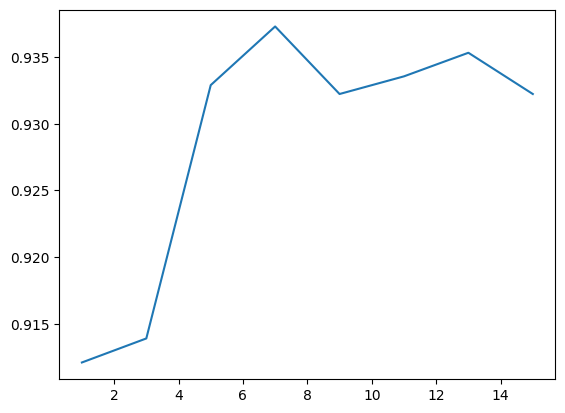

In [8]:
# Initialize the KNN classifier
nns = [1,3,5,7,9,11,13,15]
f1_vals = []
for nn in nns:
  knn_classifier = KNeighborsClassifier(n_neighbors=nn)  # Aqui ajustamos el número de vecinos

  # Ajustamos el modelo a los datos de entrenamiento
  knn_classifier.fit(X_train, y_train)
  y_val_pred = knn_classifier.predict(X_val)

  # Evaluar con las métricas exactitud y matriz de confusión
  f1_vals.append(f1_score(y_val, y_val_pred))

plt.plot(nns,f1_vals)

max_index = f1_vals.index(max(f1_vals))
print(max_index)

Vemos que gracias al escalamiento, los resultados mejoraron en comparación a no escalar.

**2.6. Evaluación en el conjunto de prueba con el número de vecinos con los mejores resultados**

In [9]:
# Ajustamos el modelo a los datos de entrenamiento
knn_classifier = KNeighborsClassifier(n_neighbors=nns[max_index])
knn_classifier.fit(X_train, y_train)
y_test_pred = knn_classifier.predict(X_test)

# Evaluar con las métricas exactitud y matriz de confusión
f_val = f1_score(y_test, y_test_pred)
print(f_val)

0.8950819672131147


### **3 Validación cruzada**

En esta sección, vamos a realizar validación cruzada. Para ello, el conjunto de datos se separará en conjunto de entrenamiento y prueba.

**3.1 Importamos las nuevas clases que necesitamos**

In [10]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


**3.2 Preparamos nuevamente los datos**
- Leemos nuevamente los datos
- Reemplazamos la columna 'Quality'
- Separamos en entrenamiento y prueba
- Escalamos los datos

In [12]:
file_path = '/content/apple_quality.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)
df.dropna(inplace=True)
df.drop(columns=['A_id'], inplace=True)
df['Quality'] = df['Quality'].map({'good': 1, 'bad': 0})

X = df.iloc[:,:-1]  #Todas las columnas menos la última
y= df.iloc[:,-1] #La última columna

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

**3.3 Realizamos la validación cruzada**
- Instanciamos en model un clasificador KNN e indicamos la cantidad de vecinos
- Instanciamos KFold indicando la cantidad de splits que queremos y si requerimos reordenar los datos.
- Usamos la función cross_val_score para entrenar el modelo con los datos de entrenamiento con las indicaciones de la validación cruzada ya establecidas. También indicamos la métrica compartiva.
- Imprimimos los resultados y la media de resultados.

In [13]:
model = KNeighborsClassifier(n_neighbors=9)

# Definir el esquema de validación cruzada (por ejemplo, KFold con 5 divisiones)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizar validación cruzada y obtener el rendimiento del modelo
cross_val_results = cross_val_score(model, X_train, y_train, cv=kf, scoring='f1')

# Imprimir los resultados de la validación cruzada
print("Resultados de validación cruzada:", cross_val_results)
print("Precisión promedio:", cross_val_results.mean())


Resultados de validación cruzada: [0.89726027 0.88440367 0.88041594 0.91882556 0.86778399]
Precisión promedio: 0.889737886930626


**3.4 Entrenamos el modelo y predecimos en el conjunto de prueba**
NOTA: Esta sección fue solo para introducir la función cross_val_score, pero realmente no le sacamos ningún provecho para seleccionar un mejor modelo, eso lo haremos en la siguiente sección.

In [14]:
# Ajustamos el modelo a los datos de entrenamiento
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)


# Evaluar con las métricas exactitud y matriz de confusión
f_test = f1_score(y_test, y_test_pred)
print(f_test)

0.9171452009844133


Podemos imprimir los parámetros del modelo

In [15]:
params = model.get_params()

# Print the parameters
print("Model Parameters:")
for param, value in params.items():
    print(f"{param}: {value}")

Model Parameters:
algorithm: auto
leaf_size: 30
metric: minkowski
metric_params: None
n_jobs: None
n_neighbors: 9
p: 2
weights: uniform


### **4. Pipeline y Grid Search**

En esta sección introducimos dos nuevas herramientas: Pipeline y GridSearch

**Pipeline** permite definir una secuencia de transformaciones o procesos que se realizaran sobre un conjunto de datos y obtener un predictor.

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

**GridSearchCV** ayuda a seleccionar los mejores hiperparámetros a través de una búsqueda sobre una 'rejilla' con todas las combinaciones de hiperparámetros y el uso de validación cruzada

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


**4.1 Importamos las herramientas**

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

**4.2 Cargamos y separamos los datos**

In [18]:
file_path = '/content/apple_quality.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)
df.dropna(inplace=True)
df.drop(columns=['A_id'], inplace=True)
df['Quality'] = df['Quality'].map({'good': 1, 'bad': 0})

X = df.iloc[:,:-1]  #Todas las columnas menos la última
y= df.iloc[:,-1] #La última columna

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

**4.3 Instanciamos un modelo y un escalador**

In [19]:
# Define the KNN model
knn_model = KNeighborsClassifier()

# Define the scaler
scaler = StandardScaler()

**4.4 Creamos una Pipeline, indicando la secuencia que se debe seguir**

In [20]:
# Create a pipeline with scaler and KNN classifier
pipeline = Pipeline([
    ('scaler', scaler),
    ('knn', knn_model)
])

**4.5 Definimos la 'rejilla' de búsqueda de hiperparámetros**

In [21]:
# Define the hyperparameters you want to search over
param_grid = {
    'knn__n_neighbors': [1,3, 5, 7, 9,11]
}

**4.6 Hacemos la validación cruzada**
En este caso, en vez de pasar el modelo, pasamos el pipeline definido, es decir, se seguiran los pasos indicados en la definición del pipeline.

In [22]:
# Define the cross-validation scheme
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Use GridSearchCV with the pipeline to find the best hyperparameter
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='f1')
grid_search.fit(X_train, y_train)

# Print the best hyperparameter and its corresponding F1 score
print("Best hyperparameter k:", grid_search.best_params_['knn__n_neighbors'])
print("Best F1 score:", grid_search.best_score_)


Best hyperparameter k: 5
Best F1 score: 0.8921899918534887


**4.7 Nos quedamos con el mejor modelo**

In [23]:
# Extract the best model from the grid search
best_model = grid_search.best_estimator_


**4.8 Predecimos y evaluamos en el conjunto de prueba**
- Escalamos el conjunto de datos de prueba de acuerdo a los valores ajustados con el mejor modelo
- Predecimos

In [24]:
# Assuming X_test is your test data
X_test_scaled = best_model.named_steps['scaler'].transform(X_test)

# Make predictions on the scaled test data
y_test_pred = best_model.predict(X_test_scaled)

f_test = f1_score(y_test, y_test_pred)
print(f_test)


0.7477551020408164


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### **5. Ejercicio, Regresión sobre conjunto de datos California Housing**
- Importa las clases requeridas de la biblioteca sklearn
- Descarga el conjunto de datos en https://www.kaggle.com/datasets/camnugent/california-housing-prices.
- Lee la información y el significado de las columnas
- Crea vectores de caracteristicas con las columnas (['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'])
- Crea un vector de targets con la columna  'median_house_value'
- Separa los datos en entrenamiento y prueba
- Crea un pipeline para escalar los datos y para usar un regresor KNN
- Define un espacio de búsqueda de hiperparametros con 5 valores diferentes de k y con la estrategia de ponderación de distancias: uniforme y weighted.
- Haz una búsqueda de hiperparámetros Grid usando validación cruzada considerando la métrica MAE (o negative MAE). Si puedes probar también con Random Search, mejor.
- Con el mejor modelo, predice y obtén la métrica MAE con el conjunto de prueba.
- Imprime los parámetros del mejor modelo.

NOTA: Para este ejercicio, se formaran equipos de 4 personas.

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Modelo de clasificación
from sklearn.neighbors import KNeighborsRegressor
#Datasplit
from sklearn.model_selection import train_test_split
#Metricas
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score, mean_absolute_error
#Preprocesamiento
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [69]:
file_path = '/content/housing.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)
df.dropna(inplace=True)
#df['Quality'] = df['Quality'].map({'good': 1, 'bad': 0})
#df.drop(columns=['A_id'], inplace=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [70]:
X = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [71]:
# Define the KNN model
knn_model = KNeighborsRegressor()

# Define the scaler
scaler = StandardScaler()

In [72]:
# Create a pipeline with scaler and KNN classifier
pipeline = Pipeline([
    ('scaler', scaler),
    ('knn', knn_model)
])

In [73]:
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9,11],
    'knn__weights': ['uniform','distance']
}

In [74]:
# Define the cross-validation scheme
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Use GridSearchCV with the pipeline to find the best hyperparameter
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameter and its corresponding F1 score
print("Best hyperparameter k:", grid_search.best_params_['knn__n_neighbors'])
print("Best hyperparameter w:", grid_search.best_params_['knn__weights'])
print("Best neg mae score:", grid_search.best_score_)


Best hyperparameter k: 7
Best hyperparameter w: distance
Best neg mae score: -41884.354155256246


In [88]:
# Extract the best model from the grid search
best_model = grid_search.best_estimator_

In [90]:
# Assuming X_test is your test data
X_test_scaled = best_model.named_steps['scaler'].transform(X_test)

# Make predictions on the scaled test data
y_test_pred = best_model.predict(X_test_scaled)

mae_test = mean_absolute_error(y_test, y_test_pred)
print(mae_test)


126352.96103691054


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
